## Set working director at ml-latest folder

In [2]:
cd ..

/tmp2/lychang/ml-latest


In [3]:
pwd

'/tmp2/lychang/ml-latest'

## Sampling

In [3]:
import random

def decision(probability):
    return random.random() < probability


In [4]:
ori_data = "./ori_data/ratings.csv"
sub_data = "./sub_data/sub_ratings.csv"


header = True
output = []
with open(ori_data, 'r') as f:
    for lines in f.readlines():
        if header:
            output.append(lines)
            header = False
            continue
        if decision(0.01):
            continue
        else:
            output.append(lines)
with open(sub_data,'w') as o:
    o.writelines(output)
del output

import gc
gc.collect()

45

## Split Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

train_data_path = "./sub_data/ml_train.csv"

test_data_path = "./sub_data/ml_test.csv"

In [6]:
df = pd.read_csv(sub_data)

In [7]:
df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


<AxesSubplot:>

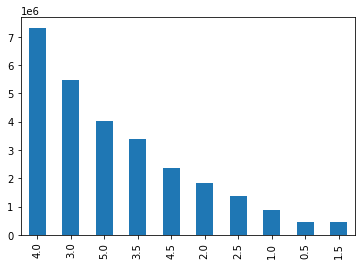

In [8]:
fig, ax = plt.subplots()
df['rating'].value_counts().plot(ax=ax, kind='bar')

split train/test dataset by time

In [9]:
df.sort_values(by="timestamp", inplace=True)

In [10]:
df.head()

,userId,movieId,rating,timestamp
5455745,56769,1176,4.0,789652004
23005725,237556,1079,3.0,789652009
23005682,237556,47,5.0,789652009
23005676,237556,21,3.0,789652009
3822841,39797,11,4.0,822873600


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data, test_data = train_test_split(df, train_size=0.8, shuffle=False)

In [13]:
train_data.to_csv(train_data_path, index=False, header=False)

In [14]:
test_data.to_csv(test_data_path,index=False, header=False)

In [15]:
!head ./sub_data/ml_train.csv

56769,1176,4.0,789652004
237556,1079,3.0,789652009
237556,47,5.0,789652009
237556,21,3.0,789652009
39797,11,4.0,822873600
236139,11,5.0,822873600
236139,10,4.0,822873600
26999,70,4.0,822873600
150485,55,4.0,822873600
150485,52,4.0,822873600


## Asking help from Encoderder

In [79]:
!python3 /tmp2/lychang/encoderder/main.py -c /tmp2/lychang/ml-latest/ml_encoderer.json

[Collecting Feature]
[Get some reading file info] ...
[Get some reading file info] done !!
100%|███████████████████████████| 21980862/21980862 [00:49<00:00, 440606.45it/s]
[Collecting Feature done] ... ...  cost 64.10 sec

[Encoding start]
[Encoding done] ... ... cost 0.38 sec

[Generate output]
100%|██████████████████████████▉| 21976620/21980862 [02:31<00:00, 143706.49it/s][cached done] ... ... cost 158.95 sec

[Gen all pair start ... ]
242049
31575
total line is 7642697175

  3%|▋                     | 253487463/7642697175 [05:45<2:37:36, 781379.10it/s]^C
Traceback (most recent call last):
  File "/tmp2/lychang/encoderder/main.py", line 53, in <module>
    main()
  File "/tmp2/lychang/encoderder/main.py", line 50, in main
    encode.gen_all_pairs(test_config, all_encoder, based_on=1)
  File "/tmp2/lychang/encoderder/encode.py", line 103, in gen_all_pairs
    for itemID in all_encoder[1].inverse_table:
KeyboardInterrupt

  3%|▋                     | 253515675/7642697175 [05:45<2:47:44

In [80]:
!head ./exp/train_dir/train.txt

4.0 200951:1  246779:1 
3.0 130356:1  244272:1 
5.0 130356:1  260161:1 
3.0 130356:1  254449:1 
4.0 184773:1  244849:1 
5.0 129028:1  244849:1 
4.0 129028:1  242050:1 
4.0 161208:1  265491:1 
4.0 47867:1  261968:1 
4.0 47867:1  261285:1 


In [82]:
!head ./exp/test_dir/test.txt 

0:1 242049:1
0:1 242050:1
0:1 242051:1
0:1 242052:1
0:1 242053:1
0:1 242054:1
0:1 242055:1
0:1 242056:1
0:1 242057:1
0:1 242058:1


---

## Training

In [83]:
import xlearn as xl

In [84]:
fm_model = xl.create_fm()  # Use factorization machine

In [85]:
fm_train_data_path = "/tmp2/lychang/ml-latest/exp/train_dir/train.txt"
fm_model_path = "/tmp2/lychang/ml-latest/exp/train_dir/train.txt.model"
fm_test_data_path = "/tmp2/lychang/ml-latest/exp/test_dir/test.txt"
fm_output_path = "/tmp2/lychang/ml-latest/exp/output.txt"

In [86]:
fm_model.setTrain(fm_train_data_path)  # Training data

# fm_model.setOnDisk()   #  Set xlearn to use on-disk training.

# param:
#  0. Binary classification task
#  1. learning rate: 0.2
#  2. lambda: 0.002
#  3. metric: accuracy
param = {'task':'reg', 'lr':0.2,
         'metric':'rmse','lambda':0.002}

# Use cross-validation
# fm_model.cv(param)

In [87]:
# Start to train
# total feautre = 337121

# The trained model will be stored in model.out
fm_model.fit(param, fm_model_path)

## Predict

!!! - You need to create the all pairs (u, i) that are NOT in the training set. !!!

In [ ]:
# Prediction task
fm_model.setTest(fm_test_data_path)  # Test data
# fm_model.setSigmoid()  # Convert output to 0-1


fm_model.setOnDisk()   #  Set xlearn to use on-disk training.


# Start to predict
# The output result will be stored in output.txt
fm_model.predict(fm_model_path, fm_output_path)

## Evaluation

In [ ]:
!python3 /tmp2/lychang/ml-latest/script/gen_user_pred.py

 26%|████▉              | 1970846672/7661096275 [2:24:41<9:49:13, 160953.31it/s]

In [4]:
import pickle
feature_table = {}
out_file = "./exp/train_dir/"
for idx in range(2):
    pkl_output_path = "/".join(out_file.split('/')[:-1])+f"/encoder{idx}_dict.pkl"

    with open(pkl_output_path,'rb') as p:
        feature_table[idx] = pickle.load(p)

In [5]:
print(feature_table[0][26573])

127986


In [6]:
print(feature_table[0][26573])

127986


In [7]:
with open("./user_pred_dict.pkl",'rb') as p:
    user_pred_dict = pickle.load(p)

In [10]:
for k in user_pred_dict:
    print(k,user_pred_dict[k])
    break

0 [('250677', '5.13586'), ('269763', '5.11201'), ('246011', '5.05358'), ('270606', '5.04613'), ('268730', '5.02287'), ('266120', '5.00884'), ('271415', '5.00286'), ('242532', '4.98986'), ('271894', '4.98317'), ('271783', '4.9822')]


In [11]:
user_actual_dict = {}

with open("./ori_data/ml_test.csv","r") as f:
    recm_list = []
    for line in f.readlines():
        user,item,_,_= line.rstrip().split(",")

        if user not in user_actual_dict:
            user_actual_dict[user] = [] 
            
        user_actual_dict[user].append(item)

In [18]:
print(len(user_actual_dict))

mmin = 777777
for k in user_actual_dict:
    if int(k) < mmin:
        mmin = int(k)
print(mmin)

47659
14


In [22]:
print(user_actual_dict['14'])

['97304', '2028', '48516', '33166', '6373', '6863', '4995', '5349', '122904', '139385', '152081', '3147', '142488', '166024', '51086', '90746', '7669', '114935', '2720', '6534', '1882', '64969', '177765', '160718', '1917', '2']


In [38]:
# trans pred item to actual ID
user_pred_dict2 = {}

for user , items in user_pred_dict.items():
    userID = int(user)
    userID = feature_table[0][userID]
    itemIDs = [int(i[0]) for i in items]
    #print(itemIDs)
    actual_itemIDs = [feature_table[1][i] for i in itemIDs]
    #print(actual_itemIDs)
    user_pred_dict2[userID] = actual_itemIDs



In [42]:
for k in user_pred_dict2:
    if k in user_actual_dict:
        print(k)
        print(user_actual_dict[k])
        print(user_pred_dict2[k])

        break

100026
['318', '134130', '138036', '111781', '120466', '136020', '122882', '117895', '140110', '117529', '122886', '133195', '135133', '122900', '130634', '150548', '114180']
['2959', '8957', '51662', '2571', '109487', '1590', '47', '3275', '296', '58559']


In [77]:
for k in user_actual_dict:
    #print(k,user_pred_dict2[k])
    print(k,user_actual_dict[k])
    break

145919 ['318', '92259', '2324', '2571', '2959', '79132', '2028', '356', '858', '3147', '4011', '296', '1961', '3578', '68954', '4886', '74789', '91542', '134853', '5618', '1198', '5952', '109487', '293', '110', '109374', '4993', '7153', '4226', '3793', '32587', '6333', '59315', '40815', '45722', '4025', '4447', '5991', '30793', '4270', '41566', '4367', '33679', '89745', '54001', '45499', '7458', '31658', '53125', '69844', '88125', '81834', '77561', '91500', '7022', '54259', '34319', '79702', '53322', '51540', '98809', '45720', '33615', '79091', '60074', '111759', '106782', '66097', '68319', '81847', '106487', '46972', '4700', '4992', '111362', '63992', '6156', '4366', '106489', '5957', '5419', '56152', '56775', '97913', '81564', '6535', '36401', '3483', '90866', '108932', '56171', '63859', '106696', '86880', '59501', '87869', '95167', '69406', '8965', '122892', '68135', '70293', '116823', '8666', '7161', '72407', '78105', '71264', '59725', '5504', '36525', '77866', '50601', '69644', '6

In [49]:
import numpy as np

def apk(actual, predicted, k=10):
    ##
    ## note : predicted list "order" does matter !!!
    ##
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

In [48]:
def mapk(actual, predicted, k=10):

    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [45]:
a = user_pred_dict2['100026']
print(a)

['2959', '8957', '51662', '2571', '109487', '1590', '47', '3275', '296', '58559']


In [46]:
ans = user_actual_dict['100026']
print(ans)

['318', '134130', '138036', '111781', '120466', '136020', '122882', '117895', '140110', '117529', '122886', '133195', '135133', '122900', '130634', '150548', '114180']


In [52]:
print(mapk(a,ans))

0.17027777777777775


In [63]:
mAP = 0
for user in user_pred_dict2:
    if user in user_actual_dict:
        ans = user_actual_dict[user]
    else:
        continue
    pred = user_pred_dict2[user]        
    mAP += mapk(pred,ans)
    
print(mAP/len(user_pred_dict2))

0.006438216745006652
